<a href="https://colab.research.google.com/github/Adithyan773/Google-colab-models/blob/main/insurance_prediction_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/insurance.csv")

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
from sklearn.preprocessing import LabelEncoder

le_sex = LabelEncoder()
le_smoker = LabelEncoder()
le_region = LabelEncoder()

df['sex']=le_sex.fit_transform(df['sex'])
df['smoker']=le_smoker.fit_transform(df['smoker'])
df['region']=le_region.fit_transform(df['region'])

sex = male 1 , female 0
smoker = yes 1 , no 0
region = southwest 3,southeast 2,northwest 1 , northeast 0

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [ ]:
import seaborn as sns

column_name=np.array(['age','sex','children','region','charges','bmi']).reshape(6,1)
def check_outliers(df,column_name):
  for column in column_name:
    df[column].boxplot()
    plt.show()

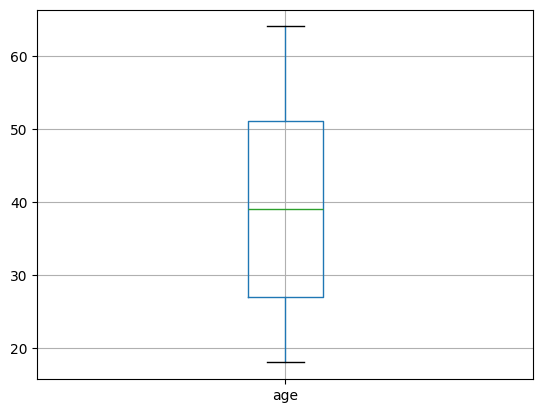

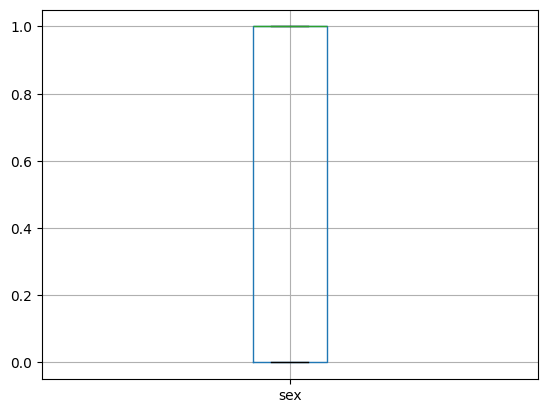

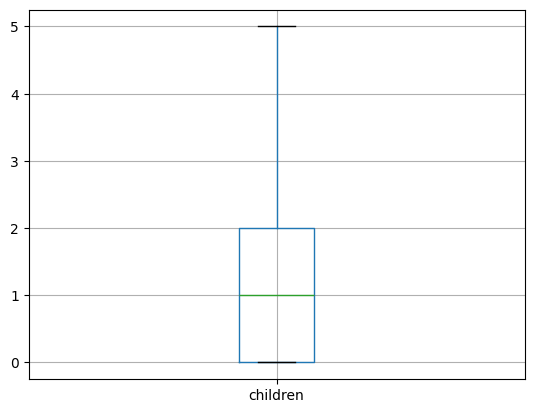

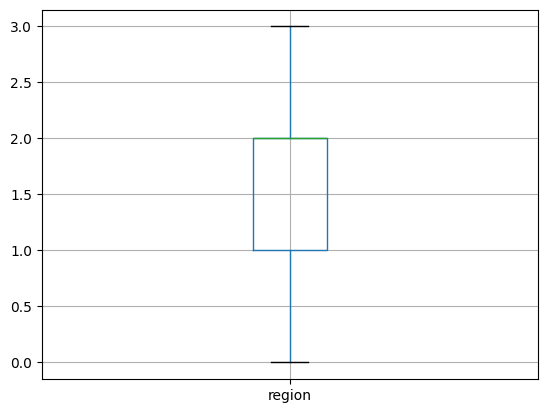

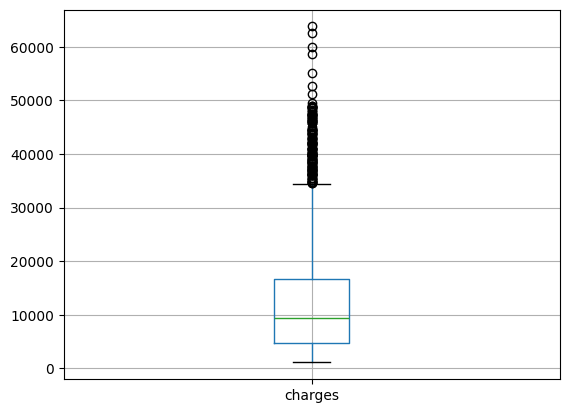

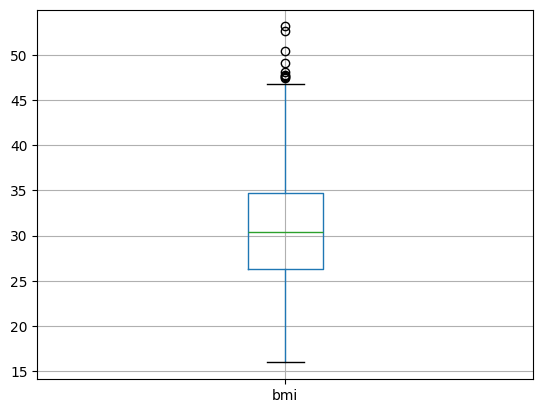

In [ ]:
check_outliers(df,column_name)

In [ ]:
Q1 = df['charges'].quantile(0.10)
Q3 = df['charges'].quantile(0.95)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df= df[(df['charges'] >= lower_bound) & (df['charges'] <= upper_bound)]

In [ ]:
Q1 = df['charges'].quantile(0.10)
Q3 = df['charges'].quantile(0.88)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df= df[(df['charges'] >= lower_bound) & (df['charges'] <= upper_bound)]

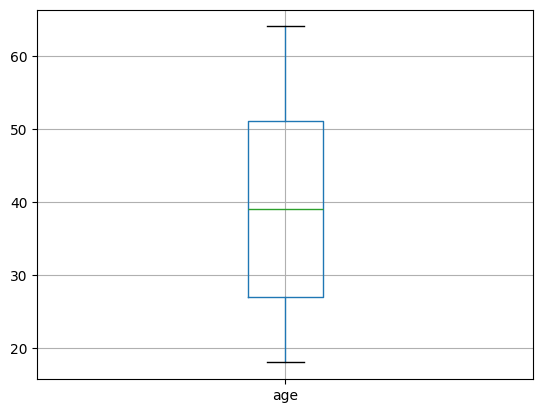

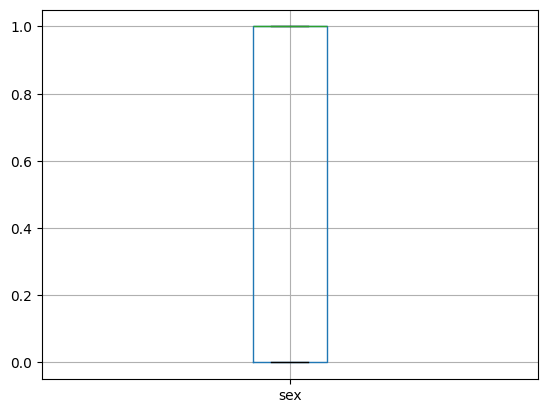

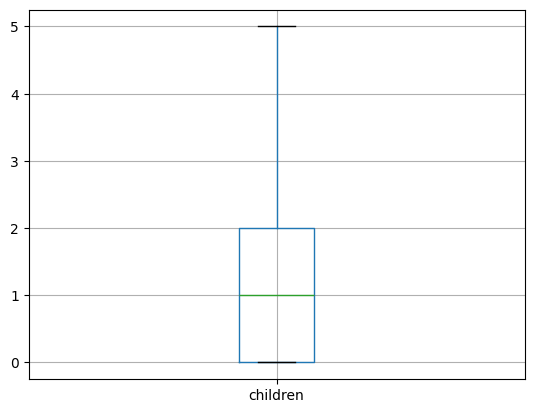

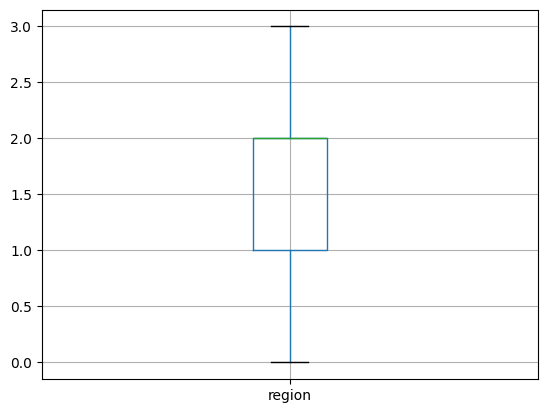

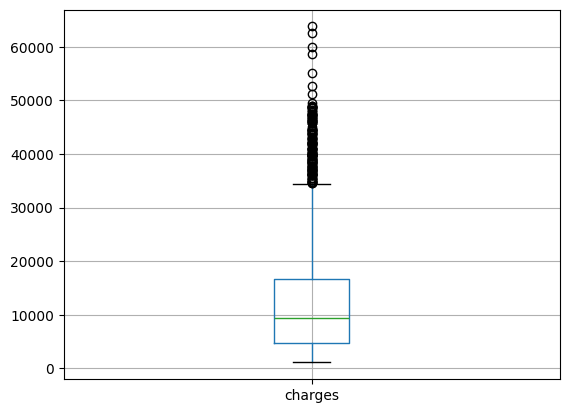

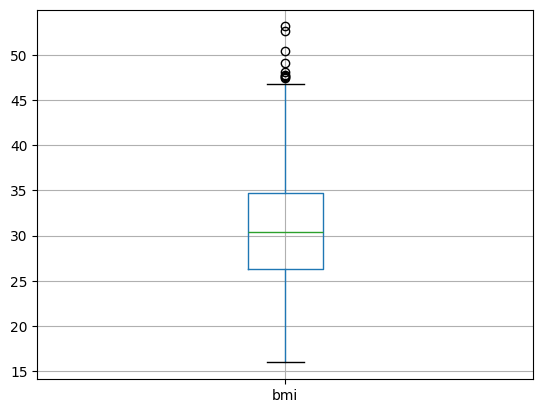

In [ ]:
check_outliers(df,column_name)

In [ ]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df['log_charges'] = np.log(df['charges'])

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges,log_charges
0,19,0,27.900,0,1,3,16884.92400,9.734176
1,18,1,33.770,1,0,2,1725.55230,7.453302
2,28,1,33.000,3,0,2,4449.46200,8.400538
3,33,1,22.705,0,0,1,21984.47061,9.998092
4,32,1,28.880,0,0,1,3866.85520,8.260197


In [ ]:
x = df[['region','sex','bmi','children','age','smoker']]
y = df['log_charges']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

In [ ]:
Le = LinearRegression()

In [ ]:
Le.fit(x_train_poly,y_train)

LinearRegression()

In [ ]:
y_pred1 = Le.predict(x_test_poly)
y_pred = np.exp(y_pred1)


mse = mean_squared_error(np.exp(y_test),y_pred)
r2 = r2_score(np.exp(y_test), y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 21110951.0289533
R-squared: 0.8640185280349814


In [ ]:
test_data = {'region': [3, 2, 2, 1, 1],
             'sex': [0, 1, 1, 1, 1],
             'bmi': [27.0, 33.0, 33.0, 22.0, 28.0],
             'children': [0, 1, 3, 0, 0],
             'age': [19, 18, 28, 33, 32],
             'smoker': [1, 0, 0, 0, 0]}
test_df = pd.DataFrame(test_data)

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges,log_charges
0,19,0,27.900,0,1,3,16884.92400,9.734176
1,18,1,33.770,1,0,2,1725.55230,7.453302
2,28,1,33.000,3,0,2,4449.46200,8.400538
3,33,1,22.705,0,0,1,21984.47061,9.998092
4,32,1,28.880,0,0,1,3866.85520,8.260197


In [ ]:
test_df

,region,sex,bmi,children,age,smoker
0,3,0,27.0,0,19,1
1,2,1,33.0,1,18,0
2,2,1,33.0,3,28,0
3,1,1,22.0,0,33,0
4,1,1,28.0,0,32,0


In [ ]:
test_df_poly = poly.transform(test_df)

In [ ]:
test_df['predicted_charges'] = np.exp(Le.predict(test_df_poly))

In [ ]:
print(test_df)

   region  sex   bmi  children  age  smoker  predicted_charges
0       3    0  27.0         0   19       1       18822.921934
1       2    1  33.0         1   18       0        2423.970909
2       2    1  33.0         3   28       0        5301.573456
3       1    1  22.0         0   33       0        3762.197556
4       1    1  28.0         0   32       0        4034.263056


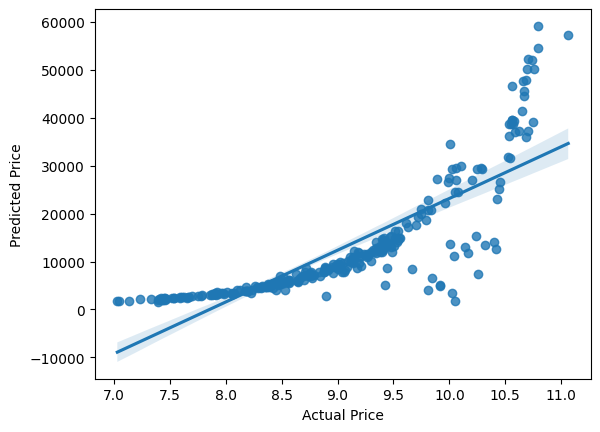

In [ ]:
sns.regplot(x=y_test,y=y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()